In [2]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair
from dfply import *
from plotnine import *
import seaborn as sns
import missingno
import random

# Stopwords from sklearn
# Stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

#### Stopwords from nltk
import nltk
from nltk.corpus import stopwords
nltk_sw = stopwords.words("english")

#### Stopwrods from spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_sw

## Sentiemtn Analysis
import textblob
import vaderSentiment

# Count vectorizer for word frequencies
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Lemonizer
from nltk.stem.wordnet import WordNetLemmatizer
# Stemer
from nltk.stem import SnowballStemmer

# Topic modeling
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from gensim import corpora
import pickle # saves the object into a file
# But don't worry Python can understand it
# import spacy
# spacy.load('en_core_web_sm')
# from spacy.lang.en import English
# parser = English()
# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
from transformers import pipeline

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [3]:
import sys
# !{sys.executable}-m pip install --upgrade ipykernel

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [4]:
# Stopword calculations
en_stop = set(nltk.corpus.stopwords.words('english'))
specialChars = "!@#$%^&*()\'\"?.,~<>_-+{}[]|;"
myPunc = set(specialChars)
en_stop.update(myPunc)
en_stop.add('n\'t')

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [5]:
speeches = pd.read_csv("un_gen_debates_text.csv", encoding = "utf-8")
print(speeches.shape)
print(speeches.columns)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(7507, 7)
Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')


7507 rows, 7 different columns.

In [6]:
speeches.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:>

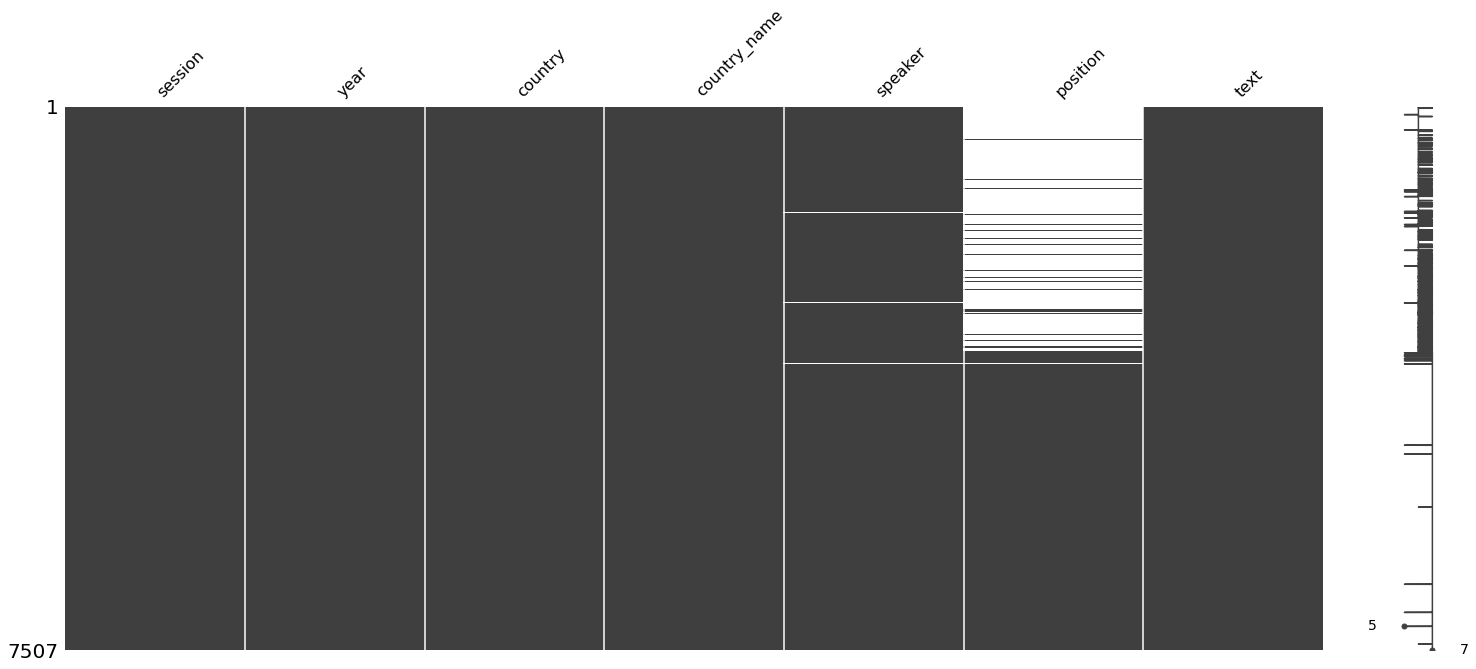

In [7]:
missingno.matrix(speeches)

Position appears to be the column with the biggest amount of missingness.

In [8]:
speeches.isna().sum()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
dtype: int64

Wow. There are quite a bit of NAs in the `position` column. I wonder why. 

And a little bit in the `speaker` column.

My God these humans talked a FREAKTON! 

I'd rather eat horse scat off a rotting cow than read this mess.

In [9]:
# Creating an nlp object
nlp = spacy.load("en_core_web_sm")
doc = nlp(speeches.text[0])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Printing text, lemma, parts of speech...

In [10]:
# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [11]:
textblob.TextBlob(doc.text).sentiment.polarity

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.116178337718085

As a whole, the first speech is filled with 0.12 sentiment. Barely positive feelings.

In [12]:
print(f"Number of stop words in nltk list: {len(nltk_sw)}")
print(f"Number of stop words in list: {len(spacy_sw)}")
#### Comparing stopword lists
print(f"Words in spacy but not in nltk: {spacy_sw.difference(set(nltk_sw))}")

Number of stop words in nltk list: 179
Number of stop words in list: 326
Words in spacy but not in nltk: {'becoming', 'beforehand', 'seem', 'herein', 'four', 'mostly', 'front', 'without', 'move', 'formerly', 'us', 'could', '‘ll', 'whereupon', 'thus', 'everyone', 'really', 'within', 'three', 'former', 'someone', 'ever', 'indeed', 'often', 'go', 'namely', 'afterwards', '’ve', 'six', 'whether', 'much', 'bottom', "'re", 'seems', 'eight', 'twenty', 'less', '’d', 'say', 'due', 'either', 'never', 'wherein', 'may', 'anyhow', 'used', 'last', 'thereafter', '’m', 'might', 'seeming', 'eleven', 'make', 'least', 'amount', 'quite', 'twelve', 'made', 'somehow', 'anyone', 'noone', 'two', '‘s', 'become', 'ten', 'beside', 'whence', 'must', 'yet', 'five', 'several', 'therein', 'alone', 'another', '‘re', 'thereby', 'wherever', 'anyway', 'n’t', 'sometimes', 'since', 'else', 'many', 'however', 'elsewhere', 'one', 'would', 'always', 'hundred', 'mine', 'somewhere', 'whereafter', 'latter', 'nevertheless', 'ther

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [13]:
#### Comparing stopword lists
print(f"Words in spacy but not in sklearn: {spacy_sw.difference(esw)}")

Words in spacy but not in sklearn: {'regarding', 'did', 'just', "'s", '’m', '‘ll', 'make', '’re', '‘d', '‘ve', 'quite', 'really', '‘m', "'m", 'ca', '’ll', 'unless', '‘s', "n't", "'ve", 'using', '’ve', '‘re', "'re", 'n‘t', 'n’t', '’d', 'say', 'various', '’s', "'ll", 'doing', "'d", 'used', 'does'}


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [14]:
#### Combine nltk and spacy stopwords into one: both_sw
both_sw = set.union(en_stop, spacy_sw)
# both_sw = en_stop.update(spacy_sw)
print(f"Length of both nltk and spacy stopwords: {len(both_sw)}")



Length of both nltk and spacy stopwords: 409


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


We have successfully combined nltk, spacy, and Daniel's stop words!

In [15]:
### Vectorize training text, set min_df to 5
speeches_text = CountVectorizer(min_df=5).fit_transform(speeches["text"])
# We want words who appear in at least 5 docs

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [16]:
print(f"Number Of Features, taking words that occur in at least 5 dfs: {speeches_text.shape[1]}")

Number Of Features, taking words that occur in at least 5 dfs: 24979


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [17]:
speeches.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


## Vectorization

- Lowercase
- Tokenize
- Build vocab: collect all vocab
- Lemmatize
- Remove stopwords? and punctuation
- Encode: count frequency of each word in each speech

Daniels crazy idea

- Grab multiple SA packages

- SA of each speech

- Graph the mean of each SA package or whatever and compare them?

In [18]:
def get_lemma(word, myLemonizer = WordNetLemmatizer()):
    '''
    Lemmatizes the word
    
    @param String word the given word to lemmatize
    @param myLemonizer the given lemmatizer; optional
    @return the newly lemmatized core word
    '''
    
#     print("word lemonizer", WordNetLemmatizer().lemmatize(word))
    # Should I do stemming too? Hmmmm
    return myLemonizer.lemmatize(word)

def get_stemmer(word, myStemmer = SnowballStemmer(language = "english")):
    '''
    Stems the word
    
    @param String word the given word to stem
    @param myStemmer the given stemmer; optional
    @return the newly stemmed core word
    '''
    return myStemmer.stem(word)
    

def removePunctuation(word):
    '''
    Removes punctuation from a given word
    
    @param String word the given word
    @return the word, without punctuation
    '''
    
    lastIndex = len(word) - 1
    if word[lastIndex] in myPunc:
        # eradicate the last index value
        return word[:-1]

    return word
    

def prepare_text_for_lda(text, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Tokenizes, splits, removes stopwords from the text.
    Basically, preparing text for LDA (one type of topic model)
    
    @param String text the given text
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the tokens
    '''
    text = text.lower()
    
    # Split by spaces
    tokens = text.split(" ")
    
    # Stripping away newline characters and tabs
    tokens = [word.strip("\n") for word in tokens]
    tokens = [word.strip("\t") for word in tokens]
#     tokens = [word.strip("\d") for word in tokens]
    # Strip damn numbers
    
    tokens = [token for token in tokens if len(token) > 1]
    # a
    
    tokens = [token for token in tokens if token not in both_sw]
#     if "the" or "an" or "and" in tokens:
# #         print(f"found the/an/and in: {tokens}")
#         print("found the/an/and")
    tokens = [get_lemma(token, myLemonizer) for token in tokens]
    tokens = [get_stemmer(token, myStemmer) for token in tokens]
    tokens = [removePunctuation(token) for token in tokens]
    return tokens

def getCleanedTokensList(data, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Gets cleaned tokens. 
    Processes include: lowercasing, splitting by spaces, strips spaces/tabs/newlines,
    punctuation, lemmatizing, stems
    
    @param DataFrame data the given data frame
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @param SnowballStemmer myStemmer the given stemmer
    @return the list of tokens for each speech
    '''
    text_data = []

    for line in data:
        tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
        text_data.append(tokens)
    return text_data


def generate_viz(data, NUM_TOPICS=5, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Graphs the data by topic.
    Also saves the files and model into other files
    
    @param list data the given list of Strings
    @param int NUM_TOPICS number of topics to graph; default set to 5
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the graph, dictionary, and corpus
    '''
#     text_data = []

#     for line in data:
#         tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
#         text_data.append(tokens)
    text_data = getCleanedTokensList(data, myLemonizer, myStemmer)

    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state = 420)
    ldamodel.save('model5.gensim')

    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(f"topic: {topic}")

    dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
    corpus = pickle.load(open('corpus.pkl', 'rb'))
    lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

    lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
    return lda_display, dictionary, corpus


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [20]:
print(len(en_stop))
print(f"Both stop length: {len(both_sw)}")
print("one" in en_stop)
# print(both_sw)

207
Both stop length: 409
False


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## Updating Both_Sw stopwords

In [26]:
# Updating Both_Sw
both_sw.update(["\n", "\t", "'s"])

# I also wanna eradicate words that appear in many documents,too
both_sw.update(["united", "states", "nation", "international", "state", "like", "would", "should", "country"])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [22]:
# myLemonizer = WordNetLemmatizer()
# list_of_strings = speeches["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings[0:5], 3)
# pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
# myLemonizer = WordNetLemmatizer()
# # list_of_strings = speeches["text"].tolist()
# list_of_strings = (
#     speeches >>
#     mask((X.country_name == "China") | (X.country_name == "Canada"))
# )["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings, 2)
# pyLDAvis.display(viz)

## Topic Modelling For Each Country

In [27]:
'''
for every country:
    list of strings
    spawn a viz, dictionary, corpus
    display
'''

countriesList = speeches["country_name"].unique()

numTopics = 3
for country in countriesList:
    
    # Grab the speeches from each country
    list_of_strings = (
        speeches >>
        mask(X.country_name == country)
    )["text"].tolist()
    
    # Spawn vizualization, dictionary, corpus
    viz, dictionary, corpus = generate_viz(list_of_strings, numTopics)
    # pyLDAvis.display(viz)
    # save image
    pyLDAvis.save_html(viz, f"Topic_Graphs_Country/{country}.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


topic: (0, '0.007*"albania" + 0.007*"kosovo" + 0.006*"nation" + 0.006*"govern"')
topic: (1, '0.019*"peopl" + 0.006*"nation" + 0.006*"albania" + 0.006*"world"')
topic: (2, '0.017*"peopl" + 0.008*"nation" + 0.008*"albania" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.005*"world" + 0.005*"argentina" + 0.005*"countri"')
topic: (1, '0.002*"new" + 0.002*"peac" + 0.002*"integr" + 0.002*"countri"')
topic: (2, '0.007*"argentina" + 0.007*"world" + 0.006*"countri" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"nation" + 0.010*"australia" + 0.008*"develop" + 0.008*"world"')
topic: (1, '0.008*"nation" + 0.003*"work" + 0.003*"iraq" + 0.003*"world"')
topic: (2, '0.013*"nation" + 0.006*"australia" + 0.006*"human" + 0.005*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.009*"austria" + 0.008*"human" + 0.006*"peac"')
topic: (1, '0.011*"nation" + 0.006*"human" + 0.005*"right" + 0.004*"austria"')
topic: (2, '0.005*"human" + 0.003*"right" + 0.002*"austria" + 0.002*"osc"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.006*"world" + 0.005*"countri" + 0.005*"belgium"')
topic: (1, '0.008*"human" + 0.007*"nation" + 0.007*"right" + 0.007*"belgium"')
topic: (2, '0.007*"world" + 0.005*"nation" + 0.005*"european" + 0.004*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"nation" + 0.012*"belarus" + 0.008*"world" + 0.006*"develop"')
topic: (1, '0.006*"belarus" + 0.005*"nation" + 0.005*"new" + 0.004*"world"')
topic: (2, '0.011*"nation" + 0.009*"peopl" + 0.008*"peac" + 0.008*"soviet"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"bolivia" + 0.007*"world" + 0.006*"nation" + 0.005*"countri"')
topic: (1, '0.011*"bolivia" + 0.007*"nation" + 0.006*"peopl" + 0.006*"econom"')
topic: (2, '0.009*"bolivia" + 0.008*"nation" + 0.007*"peopl" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"develop" + 0.009*"nation" + 0.009*"world" + 0.008*"brazil"')
topic: (1, '0.008*"nation" + 0.005*"brazil" + 0.004*"world" + 0.004*"peac"')
topic: (2, '0.003*"world" + 0.003*"nation" + 0.002*"social" + 0.002*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"nation" + 0.007*"canada" + 0.007*"world" + 0.005*"develop"')
topic: (1, '0.012*"canada" + 0.012*"nation" + 0.007*"world" + 0.006*"secur"')
topic: (2, '0.009*"nation" + 0.009*"world" + 0.007*"develop" + 0.006*"canada"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"nation" + 0.005*"cameroon" + 0.004*"world" + 0.004*"right"')
topic: (1, '0.009*"nation" + 0.008*"develop" + 0.008*"world" + 0.007*"peac"')
topic: (2, '0.008*"nation" + 0.007*"develop" + 0.007*"world" + 0.007*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"nation" + 0.002*"develop" + 0.002*"african" + 0.002*"econom"')
topic: (1, '0.003*"peopl" + 0.003*"problem" + 0.002*"south" + 0.002*"chad"')
topic: (2, '0.010*"nation" + 0.009*"peopl" + 0.008*"world" + 0.008*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"world" + 0.008*"nation" + 0.006*"colombia" + 0.006*"develop"')
topic: (1, '0.007*"drug" + 0.007*"colombia" + 0.006*"world" + 0.004*"nation"')
topic: (2, '0.009*"nation" + 0.009*"world" + 0.007*"countri" + 0.006*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.008*"peac" + 0.006*"world" + 0.006*"human"')
topic: (1, '0.004*"human" + 0.003*"develop" + 0.003*"nation" + 0.002*"promot"')
topic: (2, '0.009*"nation" + 0.009*"rica" + 0.008*"costa" + 0.008*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"peopl" + 0.007*"cuba" + 0.006*"govern" + 0.006*"nation"')
topic: (1, '0.009*"peopl" + 0.009*"countri" + 0.008*"world" + 0.007*"develop"')
topic: (2, '0.006*"right" + 0.006*"world" + 0.004*"human" + 0.004*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"vi" + 0.001*"summar" + 0.001*"plans" + 0.001*"pollut"')
topic: (1, '0.010*"dominican" + 0.009*"nation" + 0.008*"world" + 0.007*"countri"')
topic: (2, '0.008*"develop" + 0.008*"world" + 0.005*"nation" + 0.005*"dominican"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"terror" + 0.002*"algeria" + 0.001*"process" + 0.001*"implement"')
topic: (1, '0.006*"algeria" + 0.004*"nation" + 0.003*"peac" + 0.003*"new"')
topic: (2, '0.010*"nation" + 0.009*"peopl" + 0.009*"world" + 0.007*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"ecuador" + 0.003*"human" + 0.003*"world" + 0.003*"peac"')
topic: (1, '0.002*"cent" + 0.001*"debt" + 0.001*"ask" + 0.001*"open"')
topic: (2, '0.010*"ecuador" + 0.009*"nation" + 0.008*"develop" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"franc" + 0.006*"world" + 0.005*"nation" + 0.005*"countri"')
topic: (1, '0.010*"world" + 0.007*"franc" + 0.006*"nation" + 0.005*"peopl"')
topic: (2, '0.005*"european" + 0.005*"nation" + 0.005*"union" + 0.004*"franc"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"nation" + 0.005*"world" + 0.004*"secur" + 0.004*"need"')
topic: (1, '0.007*"world" + 0.007*"nation" + 0.006*"secur" + 0.005*"year"')
topic: (2, '0.011*"nation" + 0.009*"world" + 0.006*"develop" + 0.005*"year"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"africa" + 0.009*"world" + 0.008*"develop" + 0.007*"nation"')
topic: (1, '0.011*"nation" + 0.011*"develop" + 0.008*"world" + 0.007*"countri"')
topic: (2, '0.008*"ghana" + 0.008*"nation" + 0.007*"world" + 0.007*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"peac" + 0.006*"nation" + 0.005*"develop" + 0.005*"world"')
topic: (1, '0.008*"develop" + 0.008*"peac" + 0.007*"nation" + 0.007*"guinea"')
topic: (2, '0.014*"peopl" + 0.009*"nation" + 0.008*"guinea" + 0.007*"republ"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"world" + 0.002*"human" + 0.002*"war" + 0.002*"peac"')
topic: (1, '0.008*"develop" + 0.007*"nation" + 0.005*"govern" + 0.005*"peac"')
topic: (2, '0.010*"nation" + 0.009*"develop" + 0.008*"world" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.009*"guatemala" + 0.007*"peac" + 0.007*"develop"')
topic: (1, '0.002*"right" + 0.002*"human" + 0.002*"world" + 0.002*"effort"')
topic: (2, '0.012*"guatemala" + 0.009*"nation" + 0.008*"govern" + 0.008*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"nation" + 0.004*"hondura" + 0.004*"world" + 0.004*"peopl"')
topic: (1, '0.009*"nation" + 0.008*"world" + 0.006*"peopl" + 0.006*"govern"')
topic: (2, '0.010*"govern" + 0.009*"peac" + 0.009*"central" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"haiti" + 0.008*"nation" + 0.007*"peopl" + 0.007*"world"')
topic: (1, '0.007*"haiti" + 0.006*"world" + 0.005*"nation" + 0.005*"econom"')
topic: (2, '0.008*"nation" + 0.007*"haiti" + 0.007*"world" + 0.007*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"human" + 0.004*"nation" + 0.003*"world" + 0.002*"indonesia"')
topic: (1, '0.012*"nation" + 0.009*"develop" + 0.007*"world" + 0.007*"peac"')
topic: (2, '0.013*"develop" + 0.010*"nation" + 0.008*"world" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"develop" + 0.012*"nation" + 0.009*"world" + 0.008*"countri"')
topic: (1, '0.007*"nation" + 0.007*"india" + 0.006*"develop" + 0.006*"world"')
topic: (2, '0.009*"nation" + 0.008*"develop" + 0.007*"global" + 0.007*"india"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"islam" + 0.009*"peopl" + 0.009*"iran" + 0.008*"world"')
topic: (1, '0.011*"world" + 0.009*"nation" + 0.007*"iran" + 0.006*"countri"')
topic: (2, '0.006*"nation" + 0.005*"human" + 0.005*"world" + 0.004*"iran"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"iraq" + 0.008*"nation" + 0.007*"zionist" + 0.007*"arab"')
topic: (1, '0.008*"iraq" + 0.003*"nation" + 0.002*"council" + 0.002*"american"')
topic: (2, '0.018*"iraq" + 0.008*"nation" + 0.008*"secur" + 0.007*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"nation" + 0.011*"world" + 0.006*"iceland" + 0.006*"year"')
topic: (1, '0.013*"iceland" + 0.011*"nation" + 0.006*"govern" + 0.005*"world"')
topic: (2, '0.012*"nation" + 0.008*"iceland" + 0.007*"world" + 0.006*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"israel" + 0.009*"arab" + 0.008*"peac" + 0.005*"nation"')
topic: (1, '0.018*"israel" + 0.010*"peac" + 0.007*"nation" + 0.007*"arab"')
topic: (2, '0.007*"peac" + 0.007*"israel" + 0.005*"terror" + 0.005*"palestinian"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.007*"itali" + 0.006*"world" + 0.006*"develop"')
topic: (1, '0.009*"nation" + 0.006*"secur" + 0.005*"itali" + 0.004*"new"')
topic: (2, '0.005*"nation" + 0.004*"european" + 0.004*"union" + 0.003*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.018*"japan" + 0.009*"nation" + 0.006*"develop" + 0.006*"effort"')
topic: (1, '0.017*"japan" + 0.016*"nation" + 0.011*"peac" + 0.010*"world"')
topic: (2, '0.017*"japan" + 0.010*"nation" + 0.007*"develop" + 0.006*"reform"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.009*"africa" + 0.008*"develop" + 0.007*"kenya"')
topic: (1, '0.010*"nation" + 0.006*"kenya" + 0.005*"develop" + 0.004*"support"')
topic: (2, '0.014*"develop" + 0.010*"nation" + 0.010*"africa" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"cambodia" + 0.013*"nation" + 0.012*"develop" + 0.010*"world"')
topic: (1, '0.006*"cambodia" + 0.003*"nation" + 0.003*"human" + 0.003*"govern"')
topic: (2, '0.015*"peopl" + 0.013*"kampuchea" + 0.012*"nation" + 0.008*"vietnames"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"kuwait" + 0.007*"council" + 0.007*"secur" + 0.006*"nation"')
topic: (1, '0.007*"nation" + 0.007*"kuwait" + 0.007*"secur" + 0.006*"iraq"')
topic: (2, '0.012*"nation" + 0.009*"kuwait" + 0.009*"world" + 0.009*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peac" + 0.007*"lebanon" + 0.007*"nation" + 0.005*"israel"')
topic: (1, '0.017*"lebanon" + 0.008*"nation" + 0.007*"peac" + 0.007*"lebanes"')
topic: (2, '0.025*"lebanon" + 0.010*"lebanes" + 0.009*"nation" + 0.008*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"liberia" + 0.006*"nation" + 0.004*"peac" + 0.004*"world"')
topic: (1, '0.008*"liberia" + 0.007*"nation" + 0.005*"peac" + 0.004*"world"')
topic: (2, '0.012*"nation" + 0.008*"liberia" + 0.008*"world" + 0.008*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.008*"peopl" + 0.006*"nation" + 0.005*"human"')
topic: (1, '0.010*"council" + 0.009*"secur" + 0.006*"libya" + 0.005*"countri"')
topic: (2, '0.012*"peopl" + 0.010*"nation" + 0.010*"arab" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.010*"develop" + 0.009*"lanka" + 0.008*"sri"')
topic: (1, '0.007*"lanka" + 0.007*"sri" + 0.006*"child" + 0.005*"nation"')
topic: (2, '0.002*"cooper" + 0.001*"sri" + 0.001*"sanction" + 0.001*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"morocco" + 0.007*"nation" + 0.007*"world" + 0.006*"peac"')
topic: (1, '0.008*"morocco" + 0.006*"nation" + 0.004*"develop" + 0.004*"countri"')
topic: (2, '0.004*"nation" + 0.004*"govern" + 0.004*"territori" + 0.004*"spain"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.006*"develop" + 0.006*"world" + 0.005*"countri"')
topic: (1, '0.008*"develop" + 0.008*"nation" + 0.007*"world" + 0.006*"madagascar"')
topic: (2, '0.006*"world" + 0.005*"peopl" + 0.005*"peac" + 0.005*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"nation" + 0.006*"mexico" + 0.003*"human" + 0.003*"secur"')
topic: (1, '0.009*"nation" + 0.007*"world" + 0.007*"develop" + 0.006*"mexico"')
topic: (2, '0.009*"world" + 0.008*"mexico" + 0.008*"nation" + 0.007*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"secur" + 0.002*"member" + 0.002*"myanmar" + 0.002*"council"')
topic: (1, '0.015*"myanmar" + 0.014*"nation" + 0.008*"develop" + 0.005*"peac"')
topic: (2, '0.012*"nation" + 0.011*"world" + 0.009*"develop" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"nation" + 0.005*"world" + 0.004*"need" + 0.004*"human"')
topic: (1, '0.004*"nation" + 0.004*"union" + 0.003*"european" + 0.003*"countri"')
topic: (2, '0.015*"nation" + 0.009*"world" + 0.008*"human" + 0.007*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"nation" + 0.008*"develop" + 0.008*"world" + 0.007*"human"')
topic: (1, '0.010*"nation" + 0.007*"develop" + 0.007*"human" + 0.005*"right"')
topic: (2, '0.012*"nation" + 0.007*"develop" + 0.005*"world" + 0.005*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"new" + 0.012*"nation" + 0.009*"zealand" + 0.007*"year"')
topic: (1, '0.017*"new" + 0.014*"zealand" + 0.009*"nation" + 0.007*"world"')
topic: (2, '0.010*"new" + 0.008*"zealand" + 0.007*"nation" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"pakistan" + 0.009*"develop" + 0.008*"peac" + 0.008*"nation"')
topic: (1, '0.012*"pakistan" + 0.009*"world" + 0.008*"nation" + 0.007*"peac"')
topic: (2, '0.007*"pakistan" + 0.007*"india" + 0.006*"nation" + 0.005*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"peru" + 0.005*"world" + 0.005*"new" + 0.004*"nation"')
topic: (1, '0.007*"world" + 0.007*"peru" + 0.005*"countri" + 0.004*"peopl"')
topic: (2, '0.010*"develop" + 0.009*"world" + 0.009*"peru" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"nation" + 0.010*"world" + 0.009*"develop" + 0.006*"peac"')
topic: (1, '0.013*"nation" + 0.009*"philippin" + 0.009*"world" + 0.008*"develop"')
topic: (2, '0.012*"nation" + 0.008*"world" + 0.007*"develop" + 0.005*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"paraguay" + 0.006*"nation" + 0.006*"world" + 0.006*"develop"')
topic: (1, '0.012*"paraguay" + 0.010*"nation" + 0.009*"world" + 0.008*"develop"')
topic: (2, '0.009*"nation" + 0.009*"world" + 0.008*"paraguay" + 0.008*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"rwanda" + 0.007*"nation" + 0.005*"govern" + 0.004*"genocid"')
topic: (1, '0.008*"rwanda" + 0.008*"nation" + 0.004*"world" + 0.004*"govern"')
topic: (2, '0.009*"nation" + 0.009*"develop" + 0.009*"world" + 0.009*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"develop" + 0.009*"peac" + 0.009*"nation" + 0.007*"sudan"')
topic: (1, '0.010*"world" + 0.007*"nation" + 0.004*"peopl" + 0.004*"africa"')
topic: (2, '0.011*"sudan" + 0.009*"nation" + 0.008*"develop" + 0.008*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"world" + 0.010*"nation" + 0.008*"countri" + 0.007*"develop"')
topic: (1, '0.008*"nation" + 0.007*"nam" + 0.006*"viet" + 0.005*"kampuchea"')
topic: (2, '0.020*"nation" + 0.010*"world" + 0.008*"develop" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"nation" + 0.006*"peac" + 0.005*"sierra" + 0.005*"develop"')
topic: (1, '0.002*"sierra" + 0.001*"commit" + 0.001*"peac" + 0.001*"leon"')
topic: (2, '0.011*"nation" + 0.009*"develop" + 0.008*"world" + 0.007*"sierra"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peac" + 0.009*"salvador" + 0.007*"govern" + 0.007*"el"')
topic: (1, '0.008*"salvador" + 0.008*"el" + 0.007*"nation" + 0.007*"develop"')
topic: (2, '0.010*"nation" + 0.008*"develop" + 0.006*"govern" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"africa" + 0.006*"peopl" + 0.005*"world" + 0.004*"problem"')
topic: (1, '0.016*"somalia" + 0.009*"somali" + 0.007*"nation" + 0.006*"govern"')
topic: (2, '0.011*"nation" + 0.009*"world" + 0.009*"peopl" + 0.009*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"nation" + 0.011*"world" + 0.010*"peopl" + 0.010*"israel"')
topic: (1, '0.008*"syria" + 0.007*"peac" + 0.006*"israel" + 0.005*"nation"')
topic: (2, '0.006*"syria" + 0.004*"syrian" + 0.003*"terror" + 0.002*"support"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"togo" + 0.004*"peac" + 0.004*"african" + 0.004*"africa"')
topic: (1, '0.009*"countri" + 0.008*"nation" + 0.008*"peac" + 0.008*"develop"')
topic: (2, '0.010*"peac" + 0.008*"develop" + 0.008*"nation" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"nation" + 0.012*"thailand" + 0.010*"develop" + 0.008*"human"')
topic: (1, '0.002*"arf" + 0.001*"an" + 0.001*"cairo" + 0.001*"the\nasia-pacif"')
topic: (2, '0.013*"nation" + 0.009*"thailand" + 0.009*"world" + 0.009*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"tobago" + 0.007*"develop" + 0.006*"trinidad" + 0.005*"nation"')
topic: (1, '0.015*"develop" + 0.011*"tobago" + 0.010*"trinidad" + 0.008*"nation"')
topic: (2, '0.018*"develop" + 0.010*"nation" + 0.010*"tobago" + 0.009*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"nation" + 0.004*"peopl" + 0.004*"peac" + 0.004*"world"')
topic: (1, '0.012*"tunisia" + 0.009*"develop" + 0.006*"nation" + 0.006*"effort"')
topic: (2, '0.009*"world" + 0.009*"develop" + 0.008*"nation" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.006*"peac" + 0.005*"turkey" + 0.005*"secur"')
topic: (1, '0.008*"nation" + 0.008*"turkey" + 0.007*"world" + 0.007*"peac"')
topic: (2, '0.007*"nation" + 0.006*"develop" + 0.005*"turkey" + 0.005*"problem"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.007*"peopl" + 0.006*"countri" + 0.006*"peac"')
topic: (1, '0.016*"ukrain" + 0.012*"nation" + 0.008*"secur" + 0.006*"world"')
topic: (2, '0.009*"nation" + 0.009*"nuclear" + 0.008*"world" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.007*"peac" + 0.007*"develop" + 0.006*"uruguay"')
topic: (1, '0.006*"world" + 0.004*"nation" + 0.003*"human" + 0.003*"uruguay"')
topic: (2, '0.009*"nation" + 0.009*"develop" + 0.008*"world" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"nation" + 0.009*"world" + 0.006*"develop" + 0.006*"peac"')
topic: (1, '0.011*"nation" + 0.011*"world" + 0.010*"peopl" + 0.006*"peac"')
topic: (2, '0.013*"nation" + 0.010*"world" + 0.006*"peac" + 0.006*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"world" + 0.007*"peopl" + 0.006*"venezuela" + 0.005*"presid"')
topic: (1, '0.008*"world" + 0.006*"peopl" + 0.005*"venezuela" + 0.004*"nation"')
topic: (2, '0.010*"world" + 0.009*"countri" + 0.009*"develop" + 0.009*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"develop" + 0.005*"world" + 0.003*"year" + 0.003*"debt"')
topic: (1, '0.014*"world" + 0.011*"countri" + 0.010*"develop" + 0.010*"nation"')
topic: (2, '0.017*"serbia" + 0.010*"kosovo" + 0.009*"nation" + 0.006*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"nation" + 0.011*"africa" + 0.009*"develop" + 0.008*"south"')
topic: (1, '0.012*"world" + 0.008*"nation" + 0.007*"human" + 0.007*"develop"')
topic: (2, '0.012*"south" + 0.012*"africa" + 0.007*"nation" + 0.006*"african"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.006*"develop" + 0.006*"zambia" + 0.004*"peac"')
topic: (1, '0.011*"develop" + 0.009*"zambia" + 0.008*"nation" + 0.008*"africa"')
topic: (2, '0.013*"africa" + 0.012*"south" + 0.010*"nation" + 0.008*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"afghanistan" + 0.009*"peac" + 0.009*"nation" + 0.009*"peopl"')
topic: (1, '0.008*"taliban" + 0.005*"afghanistan" + 0.004*"nation" + 0.002*"1995"')
topic: (2, '0.017*"afghanistan" + 0.010*"nation" + 0.007*"peopl" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"burundi" + 0.004*"peac" + 0.004*"nation" + 0.002*"organ"')
topic: (1, '0.010*"peopl" + 0.007*"nation" + 0.007*"africa" + 0.006*"world"')
topic: (2, '0.013*"burundi" + 0.010*"nation" + 0.008*"peopl" + 0.008*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"develop" + 0.010*"nation" + 0.007*"benin" + 0.006*"countri"')
topic: (1, '0.014*"peopl" + 0.008*"world" + 0.007*"countri" + 0.007*"peac"')
topic: (2, '0.007*"develop" + 0.006*"nation" + 0.006*"benin" + 0.004*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.007*"nation" + 0.005*"peopl" + 0.005*"year"')
topic: (1, '0.010*"faso" + 0.009*"burkina" + 0.007*"world" + 0.007*"nation"')
topic: (2, '0.012*"develop" + 0.010*"countri" + 0.008*"nation" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.008*"bulgaria" + 0.006*"secur" + 0.006*"region"')
topic: (1, '0.007*"nation" + 0.005*"bulgaria" + 0.005*"region" + 0.003*"cooper"')
topic: (2, '0.011*"peopl" + 0.009*"peac" + 0.009*"bulgaria" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"law" + 0.003*"african" + 0.002*"secur" + 0.002*"nation"')
topic: (1, '0.004*"african" + 0.003*"republ" + 0.003*"central" + 0.003*"world"')
topic: (2, '0.015*"african" + 0.013*"central" + 0.010*"nation" + 0.008*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.009*"chile" + 0.008*"world" + 0.006*"govern"')
topic: (1, '0.002*"nation" + 0.002*"chile" + 0.002*"soviet" + 0.002*"time"')
topic: (2, '0.008*"nation" + 0.007*"chile" + 0.006*"world" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.017*"peopl" + 0.009*"world" + 0.007*"super-pow" + 0.006*"nation"')
topic: (1, '0.018*"develop" + 0.015*"china" + 0.011*"world" + 0.011*"peac"')
topic: (2, '0.015*"countri" + 0.013*"world" + 0.012*"peopl" + 0.011*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"d\'ivoir" + 0.001*"côte" + 0.001*"nuclear" + 0.001*"2001"')
topic: (1, '0.010*"develop" + 0.008*"nation" + 0.008*"peac" + 0.008*"countri"')
topic: (2, '0.003*"peac" + 0.003*"africa" + 0.003*"region" + 0.003*"african"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"nation" + 0.006*"zair" + 0.005*"countri" + 0.004*"world"')
topic: (1, '0.009*"nation" + 0.008*"world" + 0.007*"peac" + 0.007*"develop"')
topic: (2, '0.008*"countri" + 0.005*"nation" + 0.005*"peopl" + 0.005*"republ"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peac" + 0.007*"world" + 0.007*"develop" + 0.006*"nation"')
topic: (1, '0.005*"peac" + 0.004*"nuclear" + 0.003*"secur" + 0.002*"polit"')
topic: (2, '0.016*"nation" + 0.006*"year" + 0.006*"world" + 0.005*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"cyprus" + 0.009*"nation" + 0.009*"turkish" + 0.006*"cypriot"')
topic: (1, '0.010*"cyprus" + 0.007*"nation" + 0.004*"turkish" + 0.004*"right"')
topic: (2, '0.014*"cyprus" + 0.012*"nation" + 0.009*"problem" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peac" + 0.009*"egypt" + 0.008*"peopl" + 0.007*"nation"')
topic: (1, '0.009*"egypt" + 0.008*"world" + 0.007*"peopl" + 0.006*"develop"')
topic: (2, '0.005*"nation" + 0.004*"secur" + 0.004*"develop" + 0.004*"need"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"spain" + 0.007*"nation" + 0.005*"problem" + 0.005*"right"')
topic: (1, '0.007*"spain" + 0.005*"nation" + 0.003*"organ" + 0.003*"human"')
topic: (2, '0.010*"spain" + 0.009*"nation" + 0.006*"peac" + 0.006*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"ethiopia" + 0.010*"peac" + 0.008*"nation" + 0.008*"africa"')
topic: (1, '0.009*"nation" + 0.006*"africa" + 0.006*"develop" + 0.006*"ethiopia"')
topic: (2, '0.010*"nation" + 0.010*"develop" + 0.009*"africa" + 0.008*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"nation" + 0.007*"human" + 0.006*"need" + 0.005*"secur"')
topic: (1, '0.016*"nation" + 0.011*"develop" + 0.008*"finland" + 0.007*"secur"')
topic: (2, '0.014*"nation" + 0.008*"govern" + 0.008*"secur" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.009*"develop" + 0.007*"fiji" + 0.007*"world"')
topic: (1, '0.022*"fiji" + 0.008*"nation" + 0.006*"peopl" + 0.006*"govern"')
topic: (2, '0.009*"nation" + 0.009*"develop" + 0.008*"fiji" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.007*"countri" + 0.006*"develop" + 0.005*"nation"')
topic: (1, '0.009*"nation" + 0.009*"gabon" + 0.007*"peac" + 0.007*"develop"')
topic: (2, '0.008*"world" + 0.006*"develop" + 0.005*"countri" + 0.004*"problem"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"need" + 0.003*"global" + 0.003*"peac" + 0.003*"world"')
topic: (1, '0.001*"olymp" + 0.001*"global" + 0.001*"peac" + 0.001*"european\nunion"')
topic: (2, '0.009*"nation" + 0.006*"peac" + 0.006*"greec" + 0.006*"effort"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"develop" + 0.007*"countri" + 0.007*"world" + 0.007*"global"')
topic: (1, '0.008*"venezuela" + 0.007*"guyana" + 0.005*"develop" + 0.004*"global"')
topic: (2, '0.013*"develop" + 0.008*"nation" + 0.008*"world" + 0.007*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"peopl" + 0.008*"govern" + 0.007*"nation" + 0.007*"world"')
topic: (1, '0.010*"nation" + 0.007*"world" + 0.007*"govern" + 0.006*"right"')
topic: (2, '0.008*"nation" + 0.005*"world" + 0.005*"hungari" + 0.004*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"ireland" + 0.009*"nation" + 0.007*"world" + 0.006*"develop"')
topic: (1, '0.002*"ireland" + 0.001*"loyalti" + 0.001*"human" + 0.001*"peopl"')
topic: (2, '0.010*"nation" + 0.009*"ireland" + 0.006*"peac" + 0.005*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"nation" + 0.005*"world" + 0.004*"countri" + 0.003*"develop"')
topic: (1, '0.005*"develop" + 0.005*"global" + 0.003*"nation" + 0.002*"need"')
topic: (2, '0.016*"develop" + 0.010*"nation" + 0.009*"countri" + 0.009*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"peac" + 0.009*"nation" + 0.007*"jordan" + 0.007*"secur"')
topic: (1, '0.007*"nation" + 0.007*"israel" + 0.006*"jordan" + 0.006*"peac"')
topic: (2, '0.010*"world" + 0.009*"nation" + 0.007*"peac" + 0.007*"arab"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.018*"peopl" + 0.013*"lao" + 0.011*"countri" + 0.010*"republ"')
topic: (1, '0.009*"nation" + 0.007*"peac" + 0.005*"lao" + 0.005*"peopl"')
topic: (2, '0.017*"peopl" + 0.010*"develop" + 0.010*"lao" + 0.010*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.006*"develop" + 0.006*"european" + 0.005*"secur"')
topic: (1, '0.008*"nation" + 0.004*"luxembourg" + 0.004*"develop" + 0.004*"council"')
topic: (2, '0.007*"world" + 0.006*"nation" + 0.005*"countri" + 0.005*"communiti"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"mali" + 0.010*"develop" + 0.008*"nation" + 0.007*"peac"')
topic: (1, '0.007*"peopl" + 0.006*"nation" + 0.005*"mali" + 0.005*"world"')
topic: (2, '0.010*"world" + 0.009*"peopl" + 0.008*"nation" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"malta" + 0.009*"nation" + 0.007*"mediterranean" + 0.006*"develop"')
topic: (1, '0.010*"malta" + 0.008*"nation" + 0.004*"region" + 0.004*"year"')
topic: (2, '0.005*"nation" + 0.005*"malta" + 0.003*"union" + 0.003*"european"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"peopl" + 0.000*"nation" + 0.000*"peac" + 0.000*"republ"')
topic: (1, '0.016*"peopl" + 0.011*"republ" + 0.010*"peac" + 0.010*"mongolian"')
topic: (2, '0.012*"mongolia" + 0.011*"nation" + 0.010*"develop" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"develop" + 0.005*"peac" + 0.004*"effort" + 0.003*"hope"')
topic: (1, '0.006*"develop" + 0.006*"peac" + 0.006*"secur" + 0.005*"peopl"')
topic: (2, '0.010*"peopl" + 0.009*"nation" + 0.008*"develop" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"develop" + 0.009*"world" + 0.007*"nation" + 0.006*"countri"')
topic: (1, '0.002*"nation" + 0.002*"wish" + 0.002*"mauritius" + 0.002*"peac"')
topic: (2, '0.010*"nation" + 0.009*"develop" + 0.009*"world" + 0.007*"mauritius"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.008*"nation" + 0.004*"peopl" + 0.004*"islam"')
topic: (1, '0.011*"nation" + 0.010*"develop" + 0.008*"world" + 0.006*"countri"')
topic: (2, '0.012*"nation" + 0.009*"develop" + 0.008*"countri" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"niger" + 0.008*"develop" + 0.007*"nation" + 0.005*"secur"')
topic: (1, '0.009*"niger" + 0.008*"nation" + 0.006*"develop" + 0.006*"world"')
topic: (2, '0.010*"world" + 0.008*"nation" + 0.008*"develop" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"african" + 0.003*"peac" + 0.002*"effort" + 0.002*"nation"')
topic: (1, '0.008*"nation" + 0.007*"nigeria" + 0.006*"africa" + 0.006*"develop"')
topic: (2, '0.011*"nation" + 0.011*"africa" + 0.010*"develop" + 0.009*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"nation" + 0.008*"nicaragua" + 0.006*"govern" + 0.006*"peopl"')
topic: (1, '0.008*"new" + 0.006*"nation" + 0.005*"nicaragua" + 0.005*"world"')
topic: (2, '0.011*"peopl" + 0.009*"nicaragua" + 0.008*"nation" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"develop" + 0.011*"nation" + 0.007*"nepal" + 0.006*"world"')
topic: (1, '0.013*"nation" + 0.012*"nepal" + 0.011*"develop" + 0.009*"peac"')
topic: (2, '0.017*"develop" + 0.013*"nation" + 0.010*"peac" + 0.009*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"panama" + 0.008*"nation" + 0.007*"canal" + 0.006*"govern"')
topic: (1, '0.006*"panamanian" + 0.006*"panama" + 0.005*"govern" + 0.005*"peopl"')
topic: (2, '0.017*"panama" + 0.010*"nation" + 0.006*"world" + 0.006*"canal"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.006*"world" + 0.006*"poland" + 0.006*"develop"')
topic: (1, '0.009*"nation" + 0.007*"secur" + 0.005*"poland" + 0.005*"world"')
topic: (2, '0.010*"poland" + 0.009*"world" + 0.009*"nation" + 0.008*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.009*"world" + 0.008*"peac" + 0.006*"develop"')
topic: (1, '0.007*"peopl" + 0.006*"world" + 0.005*"nation" + 0.005*"peac"')
topic: (2, '0.011*"world" + 0.009*"nation" + 0.008*"develop" + 0.008*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"region" + 0.002*"develop" + 0.002*"nation" + 0.002*"secur"')
topic: (1, '0.012*"nation" + 0.008*"romania" + 0.006*"human" + 0.006*"region"')
topic: (2, '0.013*"nation" + 0.011*"develop" + 0.009*"world" + 0.009*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.008*"soviet" + 0.008*"world" + 0.007*"union"')
topic: (1, '0.010*"nation" + 0.007*"secur" + 0.006*"russia" + 0.006*"world"')
topic: (2, '0.011*"soviet" + 0.009*"union" + 0.008*"world" + 0.008*"nuclear"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"terror" + 0.002*"arabia" + 0.001*"terrorism" + 0.001*"palestinian"')
topic: (1, '0.008*"arab" + 0.007*"nation" + 0.006*"world" + 0.005*"saudi"')
topic: (2, '0.010*"nation" + 0.010*"peac" + 0.008*"world" + 0.007*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.006*"world" + 0.006*"peac" + 0.006*"develop"')
topic: (1, '0.008*"nation" + 0.007*"world" + 0.006*"peac" + 0.006*"africa"')
topic: (2, '0.008*"nation" + 0.007*"world" + 0.007*"develop" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"nation" + 0.009*"develop" + 0.008*"world" + 0.007*"secur"')
topic: (1, '0.004*"prevent" + 0.003*"need" + 0.003*"nation" + 0.003*"secur"')
topic: (2, '0.014*"nation" + 0.004*"peac" + 0.004*"human" + 0.004*"need"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"chad" + 0.008*"nation" + 0.007*"govern" + 0.007*"peac"')
topic: (1, '0.006*"chad" + 0.004*"nation" + 0.003*"conflict" + 0.003*"peac"')
topic: (2, '0.014*"chad" + 0.009*"nation" + 0.007*"peac" + 0.007*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.010*"africa" + 0.009*"develop" + 0.009*"world"')
topic: (1, '0.008*"develop" + 0.008*"nation" + 0.005*"world" + 0.004*"peac"')
topic: (2, '0.010*"develop" + 0.010*"nation" + 0.007*"africa" + 0.006*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"uganda" + 0.008*"develop" + 0.007*"nation" + 0.006*"peac"')
topic: (1, '0.010*"develop" + 0.010*"africa" + 0.009*"uganda" + 0.008*"nation"')
topic: (2, '0.010*"uganda" + 0.009*"world" + 0.007*"africa" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.021*"peopl" + 0.015*"nation" + 0.009*"world" + 0.008*"peac"')
topic: (1, '0.006*"region" + 0.005*"agreement" + 0.005*"effort" + 0.004*"address"')
topic: (2, '0.015*"peopl" + 0.010*"nation" + 0.010*"develop" + 0.010*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"yemen" + 0.008*"peac" + 0.007*"nation" + 0.007*"secur"')
topic: (1, '0.005*"nation" + 0.004*"secur" + 0.003*"yemen" + 0.003*"region"')
topic: (2, '0.010*"peopl" + 0.010*"nation" + 0.009*"peac" + 0.009*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.008*"peac" + 0.008*"develop" + 0.007*"arab"')
topic: (1, '0.011*"arab" + 0.009*"develop" + 0.009*"nation" + 0.008*"peac"')
topic: (2, '0.009*"peac" + 0.008*"arab" + 0.007*"region" + 0.005*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"secur" + 0.005*"develop" + 0.004*"region" + 0.004*"nation"')
topic: (1, '0.014*"world" + 0.012*"nation" + 0.010*"peac" + 0.008*"peopl"')
topic: (2, '0.009*"bahrain" + 0.009*"nation" + 0.008*"peac" + 0.007*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"black" + 0.001*"south" + 0.001*"hard" + 0.001*"white"')
topic: (1, '0.008*"develop" + 0.007*"nation" + 0.006*"barbado" + 0.004*"small"')
topic: (2, '0.014*"develop" + 0.011*"nation" + 0.008*"barbado" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"nation" + 0.009*"develop" + 0.005*"world" + 0.005*"nations"')
topic: (1, '0.017*"develop" + 0.011*"nation" + 0.008*"countri" + 0.006*"world"')
topic: (2, '0.011*"nation" + 0.010*"develop" + 0.009*"world" + 0.008*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"nation" + 0.011*"develop" + 0.007*"world" + 0.006*"effort"')
topic: (1, '0.011*"nation" + 0.007*"human" + 0.006*"right" + 0.006*"develop"')
topic: (2, '0.003*"denmark" + 0.002*"nation" + 0.002*"council" + 0.002*"united\nn"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"malawi" + 0.012*"develop" + 0.009*"nation" + 0.006*"global"')
topic: (1, '0.011*"malawi" + 0.009*"develop" + 0.009*"govern" + 0.008*"nation"')
topic: (2, '0.009*"africa" + 0.008*"nation" + 0.007*"govern" + 0.007*"malawi"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"peac" + 0.009*"develop" + 0.009*"effort" + 0.009*"nation"')
topic: (1, '0.009*"nation" + 0.008*"peac" + 0.007*"world" + 0.006*"effort"')
topic: (2, '0.010*"peac" + 0.009*"countri" + 0.008*"develop" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.007*"portug" + 0.007*"right" + 0.006*"peopl"')
topic: (1, '0.005*"nation" + 0.005*"timor" + 0.004*"east" + 0.003*"secur"')
topic: (2, '0.009*"nation" + 0.007*"portug" + 0.006*"peac" + 0.005*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"nation" + 0.011*"world" + 0.010*"peac" + 0.009*"develop"')
topic: (1, '0.014*"nation" + 0.012*"develop" + 0.008*"kingdom" + 0.008*"world"')
topic: (2, '0.010*"nation" + 0.010*"swaziland" + 0.009*"kingdom" + 0.007*"support"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"bahama" + 0.003*"haiti" + 0.003*"of\nth" + 0.003*"caribbean"')
topic: (1, '0.003*"bahama" + 0.003*"develop" + 0.002*"world" + 0.002*"nation"')
topic: (2, '0.015*"bahama" + 0.013*"nation" + 0.009*"develop" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"democrat" + 0.014*"german" + 0.013*"republ" + 0.011*"peac"')
topic: (1, '0.000*"german" + 0.000*"republ" + 0.000*"democrat" + 0.000*"peac"')
topic: (2, '0.018*"german" + 0.018*"republ" + 0.017*"democrat" + 0.008*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"world" + 0.010*"nation" + 0.010*"develop" + 0.008*"peac"')
topic: (1, '0.006*"nation" + 0.005*"european" + 0.003*"union" + 0.002*"world"')
topic: (2, '0.009*"nation" + 0.007*"world" + 0.005*"peac" + 0.005*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"develop" + 0.010*"nation" + 0.009*"africa" + 0.009*"world"')
topic: (1, '0.008*"nation" + 0.006*"world" + 0.006*"develop" + 0.004*"peac"')
topic: (2, '0.014*"africa" + 0.013*"south" + 0.008*"govern" + 0.008*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"climat" + 0.001*"cent" + 0.001*"member" + 0.001*"justic"')
topic: (1, '0.001*"of\nth" + 0.001*"united\nn" + 0.001*"way" + 0.001*"support"')
topic: (2, '0.013*"develop" + 0.012*"nation" + 0.009*"world" + 0.009*"bangladesh"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.008*"develop" + 0.007*"africa" + 0.007*"world"')
topic: (1, '0.003*"develop" + 0.002*"nation" + 0.001*"aim" + 0.001*"communiti"')
topic: (2, '0.012*"africa" + 0.011*"south" + 0.008*"nation" + 0.007*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"guinea" + 0.010*"equatori" + 0.008*"nation" + 0.008*"world"')
topic: (1, '0.011*"guinea" + 0.010*"nation" + 0.010*"equatori" + 0.008*"countri"')
topic: (2, '0.006*"polit" + 0.006*"world" + 0.006*"nation" + 0.005*"guinea"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"peopl" + 0.006*"nation" + 0.006*"human" + 0.006*"world"')
topic: (1, '0.009*"grenada" + 0.006*"develop" + 0.004*"econom" + 0.004*"world"')
topic: (2, '0.011*"develop" + 0.011*"grenada" + 0.009*"nation" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"develop" + 0.002*"right" + 0.002*"debt" + 0.001*"regard"')
topic: (1, '0.019*"peopl" + 0.009*"south" + 0.009*"africa" + 0.008*"nation"')
topic: (2, '0.010*"nation" + 0.010*"develop" + 0.008*"peac" + 0.005*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"develop" + 0.005*"peac" + 0.004*"peopl"')
topic: (1, '0.007*"peac" + 0.007*"peopl" + 0.006*"govern" + 0.006*"organ"')
topic: (2, '0.007*"world" + 0.006*"peopl" + 0.006*"peac" + 0.005*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.009*"peopl" + 0.007*"develop" + 0.006*"world"')
topic: (1, '0.011*"develop" + 0.010*"nation" + 0.007*"countri" + 0.007*"world"')
topic: (2, '0.004*"nation" + 0.004*"human" + 0.003*"countri" + 0.003*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"guinea-bissau" + 0.008*"nation" + 0.007*"polit" + 0.005*"peopl"')
topic: (1, '0.010*"peopl" + 0.009*"nation" + 0.007*"peac" + 0.007*"develop"')
topic: (2, '0.009*"develop" + 0.008*"nation" + 0.007*"world" + 0.007*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"develop" + 0.004*"nation" + 0.004*"year" + 0.003*"world"')
topic: (1, '0.012*"nation" + 0.011*"develop" + 0.009*"world" + 0.008*"maldiv"')
topic: (2, '0.007*"nation" + 0.007*"develop" + 0.006*"maldiv" + 0.006*"small"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"nation" + 0.002*"nations" + 0.002*"world" + 0.001*"forum"')
topic: (1, '0.016*"new" + 0.015*"develop" + 0.012*"guinea" + 0.012*"nation"')
topic: (2, '0.016*"new" + 0.013*"govern" + 0.011*"nation" + 0.011*"guinea"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"peopl" + 0.005*"tome" + 0.005*"sao" + 0.005*"world"')
topic: (1, '0.013*"peopl" + 0.008*"nation" + 0.007*"world" + 0.006*"econom"')
topic: (2, '0.011*"nation" + 0.010*"peopl" + 0.008*"develop" + 0.007*"tome"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"develop" + 0.011*"nation" + 0.009*"govern" + 0.008*"econom"')
topic: (1, '0.008*"nation" + 0.008*"develop" + 0.006*"world" + 0.006*"peopl"')
topic: (2, '0.007*"develop" + 0.006*"nation" + 0.005*"world" + 0.004*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"nation" + 0.004*"countri" + 0.004*"econom" + 0.004*"peac"')
topic: (1, '0.015*"peopl" + 0.010*"angola" + 0.009*"nation" + 0.008*"republ"')
topic: (2, '0.010*"angola" + 0.008*"peac" + 0.008*"nation" + 0.007*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peopl" + 0.007*"countri" + 0.005*"world" + 0.005*"nation"')
topic: (1, '0.013*"develop" + 0.008*"nation" + 0.006*"island" + 0.006*"need"')
topic: (2, '0.015*"develop" + 0.008*"countri" + 0.007*"nation" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"plan" + 0.001*"africa" + 0.001*"let" + 0.001*"united\nst"')
topic: (1, '0.010*"nation" + 0.009*"develop" + 0.008*"climat" + 0.007*"chang"')
topic: (2, '0.013*"nation" + 0.009*"world" + 0.008*"develop" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"develop" + 0.008*"nation" + 0.006*"countri" + 0.006*"viet"')
topic: (1, '0.018*"peopl" + 0.012*"countri" + 0.011*"peac" + 0.011*"viet"')
topic: (2, '0.019*"nation" + 0.013*"nam" + 0.012*"develop" + 0.012*"viet"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"develop" + 0.003*"peac" + 0.003*"nation" + 0.003*"secur"')
topic: (1, '0.007*"nation" + 0.005*"somalia" + 0.005*"world" + 0.004*"peopl"')
topic: (2, '0.009*"nation" + 0.008*"peac" + 0.007*"econom" + 0.007*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"develop" + 0.008*"nation" + 0.008*"world" + 0.007*"dominica"')
topic: (1, '0.012*"develop" + 0.012*"nation" + 0.009*"world" + 0.007*"dominica"')
topic: (2, '0.011*"develop" + 0.010*"dominica" + 0.007*"nation" + 0.006*"caribbean"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"right" + 0.004*"human" + 0.004*"nation" + 0.004*"univers"')
topic: (1, '0.011*"human" + 0.009*"nation" + 0.007*"right" + 0.006*"respons"')
topic: (2, '0.012*"human" + 0.009*"nation" + 0.006*"holi" + 0.006*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"develop" + 0.009*"lucia" + 0.009*"world" + 0.009*"saint"')
topic: (1, '0.011*"develop" + 0.010*"nation" + 0.008*"lucia" + 0.007*"saint"')
topic: (2, '0.001*"african" + 0.001*"futur" + 0.001*"century" + 0.001*"market"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.007*"nation" + 0.005*"develop" + 0.005*"vincent"')
topic: (1, '0.007*"vincent" + 0.007*"develop" + 0.006*"nation" + 0.005*"saint"')
topic: (2, '0.011*"nation" + 0.009*"world" + 0.007*"develop" + 0.005*"vincent"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"world" + 0.001*"war" + 0.001*"will" + 0.001*"power"')
topic: (1, '0.004*"africa" + 0.004*"south" + 0.003*"countri" + 0.002*"wish"')
topic: (2, '0.010*"nation" + 0.009*"develop" + 0.007*"africa" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"nation" + 0.007*"develop" + 0.006*"world" + 0.006*"countri"')
topic: (1, '0.009*"nation" + 0.009*"develop" + 0.008*"countri" + 0.007*"world"')
topic: (2, '0.010*"nation" + 0.010*"develop" + 0.008*"small" + 0.007*"barbuda"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"develop" + 0.004*"beliz" + 0.004*"world" + 0.003*"econom"')
topic: (1, '0.011*"develop" + 0.008*"nation" + 0.006*"beliz" + 0.005*"global"')
topic: (2, '0.011*"nation" + 0.008*"world" + 0.008*"beliz" + 0.008*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.018*"island" + 0.015*"solomon" + 0.013*"nation" + 0.011*"develop"')
topic: (1, '0.012*"island" + 0.005*"develop" + 0.005*"solomon" + 0.004*"nation"')
topic: (2, '0.004*"peac" + 0.003*"world" + 0.002*"peopl" + 0.002*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"nation" + 0.008*"develop" + 0.008*"peopl" + 0.007*"world"')
topic: (1, '0.012*"nation" + 0.009*"vanuatu" + 0.008*"develop" + 0.007*"peopl"')
topic: (2, '0.007*"nation" + 0.007*"world" + 0.006*"peopl" + 0.005*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"nation" + 0.008*"peopl" + 0.008*"work" + 0.008*"year"')
topic: (1, '0.017*"nation" + 0.009*"peac" + 0.009*"world" + 0.006*"region"')
topic: (2, '0.009*"region" + 0.007*"work" + 0.006*"nation" + 0.004*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.007*"develop" + 0.006*"peopl" + 0.006*"govern"')
topic: (1, '0.010*"develop" + 0.010*"nation" + 0.007*"world" + 0.006*"peopl"')
topic: (2, '0.015*"develop" + 0.010*"nation" + 0.007*"kitt" + 0.007*"saint"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"council" + 0.008*"nation" + 0.007*"law" + 0.007*"secur"')
topic: (1, '0.008*"nation" + 0.007*"right" + 0.005*"liechtenstein" + 0.005*"human"')
topic: (2, '0.007*"nation" + 0.007*"communiti" + 0.006*"liechtenstein" + 0.004*"nations"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.004*"nation" + 0.004*"africa" + 0.003*"summit"')
topic: (1, '0.011*"namibia" + 0.011*"nation" + 0.007*"world" + 0.007*"develop"')
topic: (2, '0.007*"nation" + 0.005*"peopl" + 0.004*"develop" + 0.004*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"estonia" + 0.014*"nation" + 0.006*"human" + 0.006*"world"')
topic: (1, '0.012*"estonia" + 0.011*"nation" + 0.006*"develop" + 0.005*"secur"')
topic: (2, '0.009*"nation" + 0.007*"estonia" + 0.007*"world" + 0.007*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"develop" + 0.008*"nation" + 0.007*"forum" + 0.006*"island"')
topic: (1, '0.011*"develop" + 0.009*"island" + 0.008*"nation" + 0.008*"climat"')
topic: (2, '0.001*"week" + 0.001*"develop" + 0.001*"mdgs" + 0.001*"high-level"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"korea" + 0.009*"nation" + 0.007*"republ" + 0.006*"world"')
topic: (1, '0.008*"nation" + 0.006*"korea" + 0.005*"human" + 0.005*"develop"')
topic: (2, '0.018*"korea" + 0.014*"nation" + 0.011*"republ" + 0.010*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.007*"lithuania" + 0.006*"world" + 0.006*"secur"')
topic: (1, '0.011*"lithuania" + 0.008*"nation" + 0.007*"world" + 0.005*"year"')
topic: (2, '0.016*"nation" + 0.006*"lithuania" + 0.006*"human" + 0.006*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.007*"latvia" + 0.005*"human" + 0.005*"world"')
topic: (1, '0.014*"nation" + 0.014*"latvia" + 0.008*"council" + 0.007*"secur"')
topic: (2, '0.023*"latvia" + 0.013*"nation" + 0.005*"human" + 0.005*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.017*"island" + 0.016*"nation" + 0.011*"marshal" + 0.009*"develop"')
topic: (1, '0.009*"island" + 0.008*"marshal" + 0.005*"nation" + 0.005*"develop"')
topic: (2, '0.014*"nation" + 0.011*"island" + 0.009*"marshal" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"nation" + 0.015*"korea" + 0.015*"peopl" + 0.014*"peac"')
topic: (1, '0.010*"peopl" + 0.007*"peac" + 0.007*"korea" + 0.005*"democrat"')
topic: (2, '0.003*"kim" + 0.003*"il" + 0.003*"nation" + 0.003*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"armenia" + 0.007*"nation" + 0.006*"econom" + 0.005*"peac"')
topic: (1, '0.000*"armenia" + 0.000*"nation" + 0.000*"azerbaijan" + 0.000*"world"')
topic: (2, '0.007*"armenia" + 0.006*"nation" + 0.006*"azerbaijan" + 0.006*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.019*"azerbaijan" + 0.007*"territori" + 0.007*"nation" + 0.007*"armenia"')
topic: (1, '0.013*"azerbaijan" + 0.008*"nation" + 0.005*"world" + 0.005*"conflict"')
topic: (2, '0.012*"azerbaijan" + 0.007*"secur" + 0.007*"region" + 0.006*"council"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"bosnia" + 0.011*"herzegovina" + 0.005*"peac" + 0.005*"nation"')
topic: (1, '0.016*"bosnia" + 0.013*"herzegovina" + 0.006*"nation" + 0.005*"world"')
topic: (2, '0.021*"herzegovina" + 0.021*"bosnia" + 0.008*"nation" + 0.007*"council"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"georgia" + 0.007*"world" + 0.006*"nation" + 0.006*"new"')
topic: (1, '0.009*"georgia" + 0.007*"world" + 0.005*"new" + 0.005*"today"')
topic: (2, '0.009*"nation" + 0.007*"georgia" + 0.005*"world" + 0.004*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.007*"world" + 0.007*"croatia" + 0.005*"develop"')
topic: (1, '0.007*"croatia" + 0.005*"nation" + 0.005*"order" + 0.004*"world"')
topic: (2, '0.018*"croatia" + 0.012*"nation" + 0.007*"secur" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.009*"world" + 0.005*"asia" + 0.004*"new"')
topic: (1, '0.011*"nation" + 0.006*"world" + 0.006*"econom" + 0.006*"kazakhstan"')
topic: (2, '0.015*"kazakhstan" + 0.011*"nation" + 0.010*"world" + 0.008*"nuclear"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"nation" + 0.010*"develop" + 0.008*"kyrgyzstan" + 0.007*"world"')
topic: (1, '0.010*"kyrgyzstan" + 0.008*"nation" + 0.007*"develop" + 0.006*"region"')
topic: (2, '0.004*"session" + 0.002*"nation" + 0.002*"the\nintern" + 0.002*"terror"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"moldova" + 0.012*"nation" + 0.012*"republ" + 0.007*"develop"')
topic: (1, '0.010*"nation" + 0.009*"republ" + 0.008*"moldova" + 0.005*"support"')
topic: (2, '0.011*"moldova" + 0.008*"republ" + 0.007*"nation" + 0.005*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"marino" + 0.008*"san" + 0.007*"nation" + 0.005*"right"')
topic: (1, '0.014*"marino" + 0.014*"san" + 0.011*"nation" + 0.007*"general"')
topic: (2, '0.006*"nation" + 0.006*"san" + 0.005*"marino" + 0.005*"freedom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"human" + 0.011*"nation" + 0.010*"right" + 0.007*"secur"')
topic: (1, '0.012*"nation" + 0.010*"world" + 0.007*"human" + 0.007*"slovenia"')
topic: (2, '0.011*"nation" + 0.008*"world" + 0.007*"human" + 0.006*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"tajikistan" + 0.008*"nation" + 0.006*"develop" + 0.005*"world"')
topic: (1, '0.011*"tajikistan" + 0.009*"nation" + 0.006*"world" + 0.004*"peopl"')
topic: (2, '0.013*"develop" + 0.011*"nation" + 0.011*"tajikistan" + 0.009*"water"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"afghanistan" + 0.004*"nation" + 0.004*"support" + 0.003*"region"')
topic: (1, '0.011*"nation" + 0.011*"uzbekistan" + 0.007*"region" + 0.006*"world"')
topic: (2, '0.010*"uzbekistan" + 0.009*"nation" + 0.009*"region" + 0.007*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"nation" + 0.007*"czech" + 0.006*"republ" + 0.006*"human"')
topic: (1, '0.012*"nation" + 0.009*"czech" + 0.008*"republ" + 0.007*"secur"')
topic: (2, '0.007*"czech" + 0.006*"nation" + 0.006*"republ" + 0.005*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.008*"eritrea" + 0.006*"peopl" + 0.005*"world"')
topic: (1, '0.007*"world" + 0.004*"nation" + 0.004*"peac" + 0.004*"region"')
topic: (2, '0.011*"ethiopia" + 0.010*"peac" + 0.009*"eritrea" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"monaco" + 0.006*"nation" + 0.005*"develop" + 0.005*"human"')
topic: (1, '0.007*"monaco" + 0.005*"develop" + 0.004*"princip" + 0.004*"world"')
topic: (2, '0.008*"monaco" + 0.007*"nation" + 0.006*"princip" + 0.005*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"republ" + 0.011*"macedonia" + 0.009*"nation" + 0.008*"region"')
topic: (1, '0.010*"macedonia" + 0.010*"republ" + 0.008*"nation" + 0.005*"peac"')
topic: (2, '0.010*"nation" + 0.007*"macedonia" + 0.007*"republ" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"support" + 0.003*"secur" + 0.003*"econom" + 0.003*"nation"')
topic: (1, '0.016*"nation" + 0.011*"slovakia" + 0.009*"secur" + 0.007*"council"')
topic: (2, '0.014*"nation" + 0.005*"peac" + 0.004*"slovakia" + 0.004*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.003*"sea" + 0.003*"turkmenistan" + 0.003*"world"')
topic: (1, '0.017*"nation" + 0.015*"turkmenistan" + 0.009*"develop" + 0.008*"region"')
topic: (2, '0.012*"turkmenistan" + 0.010*"nation" + 0.008*"develop" + 0.006*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"world" + 0.009*"global" + 0.007*"andorra" + 0.006*"nation"')
topic: (1, '0.008*"andorra" + 0.008*"world" + 0.007*"nation" + 0.006*"human"')
topic: (2, '0.008*"world" + 0.007*"nation" + 0.006*"andorra" + 0.005*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"develop" + 0.010*"nation" + 0.010*"palau" + 0.009*"world"')
topic: (1, '0.020*"palau" + 0.012*"nation" + 0.008*"world" + 0.005*"climat"')
topic: (2, '0.008*"world" + 0.008*"nation" + 0.006*"palau" + 0.004*"global"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"palestinian" + 0.010*"israel" + 0.009*"peopl" + 0.009*"peac"')
topic: (1, '0.011*"palestinian" + 0.010*"peac" + 0.008*"peopl" + 0.006*"israel"')
topic: (2, '0.011*"palestinian" + 0.009*"peopl" + 0.008*"peac" + 0.005*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.007*"nauru" + 0.004*"world" + 0.004*"develop"')
topic: (1, '0.017*"develop" + 0.012*"nation" + 0.011*"nauru" + 0.008*"climat"')
topic: (2, '0.007*"nauru" + 0.005*"island" + 0.005*"develop" + 0.005*"small"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"island" + 0.008*"develop" + 0.006*"nation" + 0.006*"tonga"')
topic: (1, '0.011*"tonga" + 0.010*"develop" + 0.008*"continu" + 0.006*"island"')
topic: (2, '0.017*"develop" + 0.016*"tonga" + 0.010*"nation" + 0.009*"support"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"tuvalu" + 0.014*"nation" + 0.012*"develop" + 0.007*"island"')
topic: (1, '0.000*"tuvalu" + 0.000*"nation" + 0.000*"develop" + 0.000*"climat"')
topic: (2, '0.019*"tuvalu" + 0.017*"nation" + 0.017*"develop" + 0.013*"climat"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"nation" + 0.011*"world" + 0.010*"switzerland" + 0.007*"human"')
topic: (1, '0.009*"nation" + 0.009*"council" + 0.007*"member" + 0.007*"secur"')
topic: (2, '0.014*"nation" + 0.010*"switzerland" + 0.007*"human" + 0.006*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"develop" + 0.009*"global" + 0.008*"kiribati" + 0.008*"continu"')
topic: (1, '0.014*"climat" + 0.011*"develop" + 0.009*"global" + 0.009*"challeng"')
topic: (2, '0.015*"climat" + 0.010*"develop" + 0.009*"chang" + 0.008*"island"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"world" + 0.003*"council" + 0.003*"nation" + 0.003*"countri"')
topic: (1, '0.011*"nation" + 0.009*"timor-lest" + 0.008*"develop" + 0.008*"peopl"')
topic: (2, '0.010*"nation" + 0.008*"peopl" + 0.007*"world" + 0.006*"timor-lest"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.020*"nation" + 0.016*"montenegro" + 0.010*"develop" + 0.009*"support"')
topic: (1, '0.018*"montenegro" + 0.012*"nation" + 0.008*"contribut" + 0.007*"develop"')
topic: (2, '0.017*"nation" + 0.015*"montenegro" + 0.012*"develop" + 0.008*"support"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.007*"europ" + 0.007*"european" + 0.007*"peopl"')
topic: (1, '0.011*"world" + 0.007*"worri" + 0.007*"european" + 0.007*"europ"')
topic: (2, '0.014*"syria" + 0.008*"european" + 0.007*"year" + 0.006*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"sudan" + 0.008*"govern" + 0.008*"south" + 0.008*"agreement"')
topic: (1, '0.022*"sudan" + 0.014*"south" + 0.012*"govern" + 0.010*"peac"')
topic: (2, '0.014*"sudan" + 0.010*"govern" + 0.009*"south" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [28]:
yearsList = [1980, 1990, 2000, 2010, 2015]
numTopics = 3
for myYear in yearsList:
    
    # Grab the speeches from each year-group
    list_of_strings = (
        speeches >>
        mask(X.year == myYear)
    )["text"].tolist()
    
    # Spawn vizualization, dictionary, corpus
    viz, dictionary, corpus = generate_viz(list_of_strings, numTopics)
    # pyLDAvis.display(viz)
    # save image
    pyLDAvis.save_html(viz, f"Topic_Graphs_Year/{myYear}.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


topic: (0, '0.008*"develop" + 0.007*"nation" + 0.007*"peac" + 0.007*"peopl"')
topic: (1, '0.010*"nation" + 0.009*"world" + 0.007*"develop" + 0.007*"peopl"')
topic: (2, '0.012*"peopl" + 0.008*"countri" + 0.007*"world" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"nation" + 0.008*"world" + 0.006*"countri" + 0.006*"peac"')
topic: (1, '0.011*"nation" + 0.009*"world" + 0.007*"develop" + 0.007*"peac"')
topic: (2, '0.011*"nation" + 0.011*"develop" + 0.010*"world" + 0.007*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"nation" + 0.004*"world" + 0.003*"peopl" + 0.002*"global"')
topic: (1, '0.010*"nation" + 0.007*"develop" + 0.005*"world" + 0.004*"peac"')
topic: (2, '0.007*"nation" + 0.005*"develop" + 0.005*"world" + 0.004*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.005*"nation" + 0.005*"human" + 0.004*"peopl"')
topic: (1, '0.011*"nation" + 0.009*"develop" + 0.008*"world" + 0.008*"peac"')
topic: (2, '0.015*"nation" + 0.012*"develop" + 0.009*"global" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"nation" + 0.010*"develop" + 0.007*"secur" + 0.007*"world"')
topic: (1, '0.010*"develop" + 0.009*"nation" + 0.006*"island" + 0.006*"climat"')
topic: (2, '0.011*"nation" + 0.009*"world" + 0.007*"develop" + 0.006*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [75]:
# Scratch
# d.strip("\n")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


"The whole dam world is 3just as obsessed with \nwho's \tbetter dressed"

In [29]:
myLemonizer = WordNetLemmatizer()
a = "The sun is shining beautifully."
b = "The world has curiosity"
c = "Daniel is a dumb idiot"
d = "The whole dam world is 3just as obsessed with \nwho's \tbetter dressed"


text = [a, b, c, d]
# spareList = ["hello"]
# tokens = prepare_text_for_lda(text, myLemonizer)
# print(tokens)
# spareList.append(tokens)
# print(spareList)

viz, dictionary, corpus = generate_viz(text, 3, myLemonizer)
pyLDAvis.display(viz)

topic: (0, '0.138*"daniel" + 0.138*"idiot" + 0.138*"dumb" + 0.138*"curios"')
topic: (1, '0.174*"sun" + 0.174*"shine" + 0.174*"beautifully" + 0.044*"world"')
topic: (2, '0.116*"world" + 0.114*"3just" + 0.114*"who" + 0.114*"better"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
# list_of_strings = speeches["text"].tolist()
# myLemonizer = WordNetLemmatizer()
# viz, dictionary, corpus = generate_viz(list_of_strings, 4, myLemonizer)
# pyLDAvis.display(viz)

In [ ]:
# # Can we save the viz?
# print(type(viz))

In [ ]:
# list_of_strings = speeches["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings, 3)
# pyLDAvis.display(viz)

In [ ]:
# viz, dictionary, corpus = generate_viz(list_of_strings, 4)
# pyLDAvis.display(viz)

In [66]:
# myText = "34 more \n44moves"
# myText.strip("\d+")
# myText.strip("\n")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-66-4587ec8c108d>:2: DeprecationWarning: invalid escape sequence \d


'34 more \n44moves'

## Attempting More Topic Modeling

Using Prof Gregory Lyon's code

In [32]:
def top_words_f(n_words):
    '''
    Extract the top words from each topic
    
    @param int n_words the number of top words to grab from each topic
    @return the resulting dataframe
    '''
    n_words=n_words
    imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]
    words_in_topic = ([imp_words(x) for x in lda.components_])
    main_topics = [' '.join(x) for x in words_in_topic]
#     df = pd.DataFrame(main_topics).T
#     df.columns = columns=["Topic_" + str(each) for each in range(lda.n_components)]
    df = pd.DataFrame({"top_words": main_topics},
                             index=["Topic_" + str(each) for each in range(lda.n_components)])
    return df

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### Steps:

    1: Instantiate vectorizer with parameters: vec
    2: Vectorize column of text with fit_transform: X
    3: Instantiate LDA model with parameters: lda
    4: Fit LDA model to vectorized text: doc_topics

In [33]:
# 1: create vectorizer
# countervectorizer transforms words into vectors!
vec = CountVectorizer(stop_words= both_sw)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [34]:
# get_stemmer()
# speeches["text"]
# text_data[0]

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [35]:
myLemonizer = WordNetLemmatizer()
myStemmer = SnowballStemmer(language = "english")

# for mySpeech in speeches["text"]:
#     prepare_text_for_lda(mySpeech, myLemonizer, myStemmer)
text_data = getCleanedTokensList(speeches["text"], myLemonizer, myStemmer)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [36]:
# print(" ".join(text_data[0]))
print(text_data[0])

['33:', 'convey', 'presid', 'congratul', 'albanian', 'deleg', 'elect', 'presid', 'twenty-fifth', 'session', 'general', 'assembly?\n34.\tin', 'take', 'work', 'agenda', 'twenty', 'fifth', 'session', 'general', 'assembly', 'held', 'eve', 'twenty-fifth', 'anniversari', 'come', 'forc', 'charter', 'nations', 'peace-lov', 'member', 'wish', 'posit', 'present', 'occas', 'pictur', 'posit', 'satisfactori', 'activ', 'nations', 'albanian', 'delegation', 'part', 'taken', 'great', 'pleasur', 'draw', 'balanc', 'sheet', 'activ', 'cover', 'quarter', 'century', 'certain', 'short', 'period', 'life', 'organization', 'unfortunately', 'situation', 'creat', 'day', 'victori', 'achiev', 'power', 'rome', 'berlintokyo', 'axi', 'conceiv', 'spirit', 'principl', 'predomin', 'war', 'antifascist', 'coalition', 'organ', 'awaken', 'progress', 'human', 'hope', 'serv', 'import', 'factor', 'creat', 'better', 'condit', 'order', 'favor', 'caus', 'freedom', 'peac', 'world', 'security', 'activ', 'number', 'event', 'occur', 'wo

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [37]:
# print(text_data[0])
print(len(text_data))
speechesSeries = pd.Series()
for mySpeech in text_data:
#     textForm = " ".join(mySpeech)
    seriesForm = pd.Series(mySpeech)
    speechesSeries = speechesSeries.append(seriesForm, ignore_index=True)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<ipython-input-37-fd25541ce06f>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


7507


In [38]:
dictionary = gensim.corpora.Dictionary(text_data)

# For fun
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0 (1967)
1 (bissau)
2 ,bi
3 12
4 18
5 1938.
69.	the
6 1948
7 1967
8 21
9 22
10 2]


I want to extract words who appear in:

- fewer than 15 speeches
- more than 50% of speeches in total

and keep only the first 100000 most frequent words.

In [39]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### Gensim doc2bow

In [40]:
bow_corpus = [dictionary.doc2bow(doc) for doc in text_data]
# bow_doc_4310 = bow_corpus[4310]
# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                dictionary[bow_doc_4310[i][0]], 
# bow_doc_4310[i][1]))

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [41]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### LDA With Bag Of Words

In [42]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# oneList = " ".join(text_data)
# pd.Series(text_data)
# speeches["text"]

Topic: 0 
Words: 0.004*"arab" + 0.003*"palestinian" + 0.003*"israel" + 0.003*"iraq" + 0.002*"terror" + 0.002*"climat" + 0.002*"isra" + 0.002*"central" + 0.002*"deleg" + 0.002*"union"
Topic: 1 
Words: 0.002*"deleg" + 0.002*"of
th" + 0.002*"summit" + 0.002*"growth" + 0.002*"climat" + 0.002*"small" + 0.002*"convent" + 0.002*"institut" + 0.002*"terror" + 0.002*"context"
Topic: 2 
Words: 0.004*"climat" + 0.003*"small" + 0.003*"island" + 0.002*"sustain" + 0.002*"agenda" + 0.002*"israel" + 0.002*"deleg" + 0.002*"america" + 0.002*"economi" + 0.002*"dialogu"
Topic: 3 
Words: 0.004*"sustain" + 0.003*"european" + 0.003*"union" + 0.003*"climat" + 0.002*"co-oper" + 0.002*"agenda" + 0.002*"comprehens" + 0.002*"growth" + 0.002*"disarma" + 0.002*"convent"
Topic: 4 
Words: 0.002*"of
th" + 0.002*"union" + 0.002*"programm" + 0.002*"israel" + 0.002*"arab" + 0.002*"terror" + 0.002*"deleg" + 0.002*"sustain" + 0.002*"agenda" + 0.002*"rule"
Topic: 5 
Words: 0.003*"of
th" + 0.003*"small" + 0.002*"poverti" + 0.

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


It appears that many of these words do not hold significant weight for each topic. Nevertheless, we can try to differentiate different topics. Topic 0 appears to be about co-operation between Palestine and Israel (two countries known to be at war with each other).

Topic 1 seems to be about delegation.

In [43]:
speechesSeries

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0                   33:
1                convey
2                presid
3             congratul
4              albanian
               ...     
10025545        develop
10025546    interaction
10025547         poster
10025548         expect
10025549             us
Length: 10025550, dtype: object

In [44]:
# 2: create dtm
# myX = vec.fit_transform(speeches["text"])
myX = vec.fit_transform(speeches["text"])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [45]:
# 3 create lda
lda = LatentDirichletAllocation(n_components= 4, learning_method= "online")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [46]:
# 4 fit lda
doc_topics = lda.fit_transform(myX)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [47]:
# 5
print(f"There are {lda.components_.shape[0]} topics and {lda.components_.shape[1]} words")

There are 4 topics and 54568 words


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Extracting Top Words From Each Topic

In [48]:
## Get feature names (vocabulary)
voc = np.array(vec.get_feature_names())
voc

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array(['00', '000', '0001', ..., 'ш1оп', 'ш1ь1а', 'ьо1л'], dtype='<U23')

In [49]:
"nations" in both_sw

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


False

In [50]:
# Call function and specify number of top words
numTopWords = 10
main_topics_df = top_words_f(numTopWords)
main_topics_df

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,top_words
Topic_0,world people nations human today peace new cou...
Topic_1,nations development security peace world count...
Topic_2,people peace countries africa world nations so...
Topic_3,nations countries world peace economic general...


In [51]:
for i, each in enumerate(main_topics_df["top_words"]):
    print(f"Top words in topic {i}: {each}\n")

Top words in topic 0: world people nations human today peace new countries years war

Top words in topic 1: nations development security peace world countries general community economic council

Top words in topic 2: people peace countries africa world nations south security peoples arab

Top words in topic 3: nations countries world peace economic general new development nuclear security



C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [52]:
topicDict = {
    0: "national security",
    1: "people",
    2: "countries",
    3: "development"
}

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [53]:
cols = ["Topic_" + str(each) for each in range(lda.n_components)]
docs = ["Document_" + str(each) for each in range(myX.shape[0])]

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [54]:
# the fitted lda model
print(doc_topics.shape)
doc_topics

(7507, 4)


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([[1.99249091e-02, 6.98776835e-05, 7.52226362e-01, 2.27778852e-01],
       [9.37998840e-02, 5.29085838e-03, 1.28174197e-04, 9.00781083e-01],
       [8.38622347e-02, 5.87351664e-02, 6.09026160e-04, 8.56793573e-01],
       ...,
       [2.49349732e-04, 8.41411815e-01, 1.58091845e-01, 2.46990118e-04],
       [3.82426769e-02, 9.61289648e-01, 2.35447478e-04, 2.32227869e-04],
       [7.66517311e-02, 7.85981063e-01, 1.37046770e-01, 3.20435252e-04]])

Honestly, doc_topics is simply a bumnch of weights

In [55]:
df_topics_df = pd.DataFrame(np.round(doc_topics, 2),
                        columns=cols,
                        index=docs)
imp_topic = np.argmax(df_topics_df.values, axis=1)
df_topics_df["top_topic"] = imp_topic
df_topics_df

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Topic_0,Topic_1,Topic_2,Topic_3,top_topic
Document_0,0.02,0.00,0.75,0.23,2
Document_1,0.09,0.01,0.00,0.90,3
Document_2,0.08,0.06,0.00,0.86,3
Document_3,0.07,0.03,0.02,0.88,3
Document_4,0.08,0.05,0.00,0.87,3
...,...,...,...,...,...
Document_7502,0.14,0.29,0.57,0.00,2
Document_7503,0.70,0.21,0.00,0.09,0
Document_7504,0.00,0.84,0.16,0.00,1
Document_7505,0.04,0.96,0.00,0.00,1


In [65]:
print(f"Speeches shape: {speeches.shape}")
print(f"Topics Shape: {df_topics_df.shape}")

Speeches shape: (7507, 7)
Topics Shape: (7507, 5)


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [67]:
# TODO: horizontally concat with speeches
# pd.concat([speeches, df_topics_df], axis = 1, ignore_index = True)
speech_topics = pd.concat([speeches.reset_index(drop=True), df_topics_df.reset_index(drop=True)], axis=1)
print(f"speech_topics shape: {speech_topics.shape}")
speech_topics.head()

speech_topics shape: (7507, 12)


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,session,year,country,country_name,speaker,position,text,Topic_0,Topic_1,Topic_2,Topic_3,top_topic
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,0.02,0.00,0.75,0.23,2
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,0.09,0.01,0.00,0.90,3
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,0.08,0.06,0.00,0.86,3
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,0.07,0.03,0.02,0.88,3
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",0.08,0.05,0.00,0.87,3


In [57]:
# pyLDAvis.save_html(viz, 'lda.html')
# pyLDAvis.save_html(viz, "lda_4_topics.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [59]:
# summarize = pipeline("summarization")
# summary = summarize(list_of_strings[0:1], max_length = 10, clean_up_tokenization_spaces=True)
# summary

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
# '''
# for every speech:
#     spawn nlp()
#     tokenize()
#     remove stop words
#     remove punctuation and special characters!
    
# '''
# def toTokenize(text):
#     '''
#     Tokenizes a text
    
#     @param NLP text the given NLP figure
#     @return a list of tokenized words
#     '''
#     text_tokenized = []

#     for t in text:
#         text_tokenized.append(t.text)
#     return text_tokenized

# def removeStopwords(text_tokenized, sw = both_sw):
#     '''
#     Removes stopwords from a given tokenized text list
    
#     @param list text_tokenized the given list of tokenized words
#     @param set sw default is the nltk-spaCy stopwords
#     @return a filtered, tokenized list (without stopwords!)
#     '''
    
#     # Filter out stopwords (using list comprehension)
#     text_filtered = [w for w in text_tokenized if w not in sw]
#     return text_filtered

# def toLemmatize():
#     '''
    
#     '''
#     print("helo")

# maxNumDoc = 3
# # docIndex = 0
# for docIndex in range(len(speeches.text[0:maxNumDoc])):

#     speech = speeches["text"][docIndex].lower()
    
#     # nlp object
#     nlpSpeech = nlp(speech)
    
#     # tokenize speech
#     text_tokenized = toTokenize(nlpSpeech)
    
#     # tokenized, no stopwords
#     text_filtered = removeStopwords(text_tokenized)
    
    
#     vec = CountVectorizer
# #     sentiment_polarity = [textblob.TextBlob(speech.text).sentiment.polarity for speech in doc]
# #     print(len(sentiment_polarity))

In [ ]:
# # print("hello")
# myLemonizer = WordNetLemmatizer()
# myStemmer = SnowballStemmer(language = "english")
# words = ["viet-nam", "Vietnam", "Viet", "depending", "depends", 
#          "carries", "carry", "carri", "generosity", "generous", "better",
#          "best", "in a meeting", "meeting", "am meeting you", "countries", "country"
#         ]
# for word in words:
#     word = word.lower()
#     print(f"Lemmatize: {myLemonizer.lemmatize(word)}, Stem: {myStemmer.stem(word)}")

In [ ]:
# sentiment_polarity = [textblob.TextBlob(speech).sentiment.polarity for speech in speeches.text[0:5]]
# predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

In [ ]:
# sentiment_polarity

Spliting CSV files in Python

https://dzone.com/articles/splitting-csv-files-in-python